In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
# Dermatology dataset from UCI is used
# Used for classifying 6 skin diseases (psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris) based on 23 features
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
columns = ["erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon", "polygonal_papules", "follicular_papules", "oral_mucosal", "knee_elbow", "scalp", "family_history", "melanin", "eosinophils", "PNL", "fibrosis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing", "elongation", "spongiosis", "mitosis", "target"]
df = pd.read_csv(dataset_url, header=None, names=columns, na_values="?")

In [3]:
df.isnull().sum()

erythema              0
scaling               0
definite_borders      0
itching               0
koebner_phenomenon    0
polygonal_papules     0
follicular_papules    0
oral_mucosal          0
knee_elbow            0
scalp                 0
family_history        0
melanin               0
eosinophils           0
PNL                   0
fibrosis              0
exocytosis            0
acanthosis            0
hyperkeratosis        0
parakeratosis         0
clubbing              0
elongation            0
spongiosis            0
mitosis               8
target                0
dtype: int64

In [4]:
# Handle missing values
df.dropna(inplace=True)

In [5]:
X = df.drop("target", axis=1) #Features
y = df["target"] #Target variable

In [6]:
#Label encoding target variable (multi-class)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #splitting data for testing and training
#stratify=y, is used for ensuring that the proportion of classes in y is preserved in both training and testing splits.

In [8]:
# Standardize features using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),   #Define the input layer, specifying the input shape (number of features in the training data)
    Dense(128, activation='relu'), #Add a hidden layer with 128 neurons and reLu activation function
    Dense(64, activation='relu'), #Add a hidden layer with 64 neurons and reLU activation function
    Dense(32, activation='relu'), #Add a hidden layer with 32 neurons and reLU activation function
    Dense(len(np.unique(y)), activation='softmax')  #Add the output layer with the total number of classes in the target variable and softmax activation function
])

In [10]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2110 - loss: 1.8846 - val_accuracy: 0.5690 - val_loss: 1.3056
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6787 - loss: 1.3017 - val_accuracy: 0.9138 - val_loss: 0.9156
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7726 - loss: 0.9591 - val_accuracy: 0.9483 - val_loss: 0.6277
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8359 - loss: 0.6732 - val_accuracy: 0.9483 - val_loss: 0.4236
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8230 - loss: 0.5210 - val_accuracy: 0.9483 - val_loss: 0.3048
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8254 - loss: 0.4008 - val_accuracy: 0.9655 - val_loss: 0.2396
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9371 - loss: 0.2609 - val_accuracy: 0.9310 - val_loss: 0.2045
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9554 - loss: 0.2230 - val_accuracy: 0.9483 - val_loss: 0.1701


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.92


In [13]:
# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.71      0.83      0.77        12
           2       1.00      1.00      1.00        14
           3       0.75      0.60      0.67        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           0.92        72
   macro avg       0.91      0.91      0.91        72
weighted avg       0.92      0.92      0.92        72



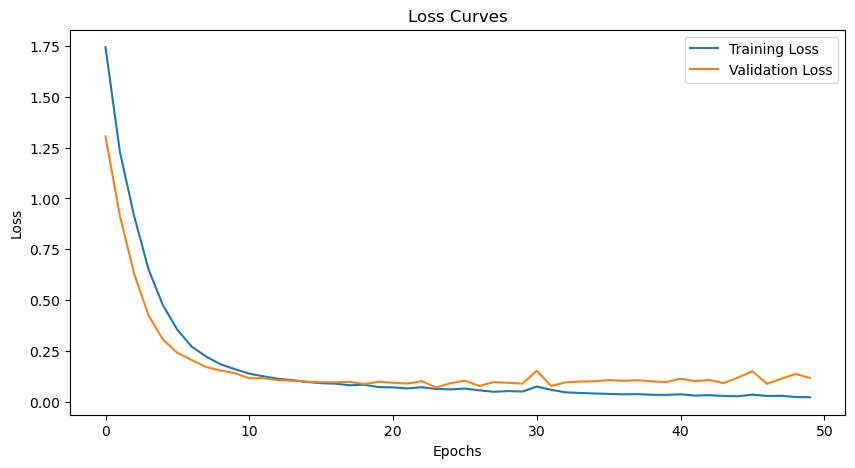

In [14]:
# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()